# Questionário 2 
## Matheus Araujo Pinheiro 14676810

In [47]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

1. Para a rede social Hamsterster, calcule a média dos menores caminhos e o diâmetro. Considere apenas o maior componente.


In [ ]:
# Le a lista de arestas do arquivo e cria o grafo
grafo = nx.read_edgelist("data/hamsterster.txt", nodetype=int)

# Transforma o grafo em nao direcionado e remove auto lacos
grafo = grafo.to_undirected()
grafo.remove_edges_from(nx.selfloop_edges(grafo))

# Seleciona o maior componente conexo do grafo
componentes_conexos = sorted(nx.connected_components(grafo), key=len, reverse=True)
grafo = grafo.subgraph(componentes_conexos[0])

# Converte os rotulos dos nos para inteiros consecutivos comecando do zero
grafo = nx.convert_node_labels_to_integers(grafo, first_label=0)

# Numero de nos e numero de arestas
numero_nos = len(grafo)
numero_arestas = grafo.number_of_edges()

# Calcula a media dos menores caminhos entre os pares de nos
if nx.is_connected(grafo):
    comprimento_medio_caminho = nx.average_shortest_path_length(grafo)
    print("Average shortest path length:", "%3.4f" % comprimento_medio_caminho)
else:
    print("The graph has more than one connected component")

# Calcula o diametro da rede
diametro = nx.diameter(grafo)
print("Network diameter:", diametro)

Average shortest path length: 3.4526
Network diameter: 14


2. Para a rede de aeroportos (base USairport500), calcule a média e variância do comprimento dos menores caminhos. Considere apenas o maior componente na rede.

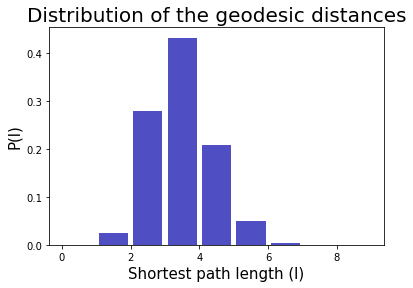

Mean shortest path length: 2.9910
Variance of shortest path lengths: 0.8175


In [42]:
# Le a lista de arestas do arquivo e cria o grafo
grafo = nx.read_edgelist("data/USairport500.txt", nodetype=int)

# Transforma o grafo em nao direcionado e remove auto lacos
grafo = grafo.to_undirected()
grafo.remove_edges_from(nx.selfloop_edges(grafo))

# Seleciona o maior componente conexo do grafo
componentes_conexos = sorted(nx.connected_components(grafo), key=len, reverse=True)
grafo = grafo.subgraph(componentes_conexos[0])

# Converte os rotulos dos nos para inteiros consecutivos comecando do zero
grafo = nx.convert_node_labels_to_integers(grafo, first_label=0)

# Numero de nos e numero de arestas
numero_nos = len(grafo)
numero_arestas = grafo.number_of_edges()

# Matriz de todas as distancias entre os pares de nos
if nx.is_connected(grafo):
    matriz_distancias = zeros(shape=(numero_nos, numero_nos))
    lista_caminhos = []
    for i in np.arange(0, numero_nos):
        for j in np.arange(i + 1, numero_nos):
            if i != j:
                caminho_mais_curto = nx.shortest_path(grafo, i, j)
                comprimento = len(caminho_mais_curto) - 1
                matriz_distancias[i][j] = comprimento
                matriz_distancias[j][i] = comprimento
                lista_caminhos.append(comprimento)
    
    diametro = nx.diameter(grafo)
    eixo_x = range(0, diametro + 1)
    
    plt.hist(lista_caminhos, bins=eixo_x, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title("Distribution of the geodesic distances", fontsize=20)
    plt.ylabel("P(l)", fontsize=15)
    plt.xlabel("Shortest path length (l)", fontsize=15)
    plt.savefig('av_short_path.svg')
    plt.show()
else:
    print("The graph has more than one connected component")

# Calcular a media e a variancia dos caminhos mais curtos
media_caminhos = np.mean(lista_caminhos)
variancia_caminhos = np.var(lista_caminhos)

print(f"Mean shortest path length: {media_caminhos:.4f}")
print(f"Variance of shortest path lengths: {variancia_caminhos:.4f}")



3. Calcule o coeficiente de assortatividade para a rede Advogato. Considere apenas o maior componente. Considere o valor mais próximo.

In [39]:
# Le a lista de arestas do arquivo e cria o grafo
grafo = nx.read_edgelist("data/advogato.txt", nodetype=int)

# Transforma o grafo em nao direcionado e remove auto lacos
grafo = grafo.to_undirected()
grafo.remove_edges_from(nx.selfloop_edges(grafo))

# Seleciona o maior componente conexo do grafo
componentes_conexos = sorted(nx.connected_components(grafo), key=len, reverse=True)
grafo = grafo.subgraph(componentes_conexos[0])

# Converte os rotulos dos nos para inteiros consecutivos comecando do zero
grafo = nx.convert_node_labels_to_integers(grafo, first_label=0)

# Calcula o coeficiente de assortatividade
coeficiente_assortatividade = nx.degree_assortativity_coefficient(grafo)
print("Assortativity =", "%3.4f" % coeficiente_assortatividade)


Assortativity =  -0.0957


4. Para a rede de aeroportos (USairport500), calcule a entropia de Shannon considerando o comprimento dos menores caminhos. Use o logaritmo na base 2 e considere apenas o maior componente.

In [ ]:
# Le a lista de arestas do arquivo e cria o grafo
grafo = nx.read_edgelist("data/USairport500.txt", nodetype=int)

# Transforma o grafo em nao direcionado e remove auto lacos
grafo = grafo.to_undirected()
grafo.remove_edges_from(nx.selfloop_edges(grafo))

# Seleciona o maior componente conexo do grafo
componentes_conexos = sorted(nx.connected_components(grafo), key=len, reverse=True)
grafo = grafo.subgraph(componentes_conexos[0])

# Converte os rotulos dos nos para inteiros consecutivos comecando do zero
grafo = nx.convert_node_labels_to_integers(grafo, first_label=0)

# Numero de nos e numero de arestas
numero_nos = len(grafo)
numero_arestas = grafo.number_of_edges()

# Matriz de todas as distancias entre os pares de nos
if nx.is_connected(grafo):
    matriz_distancias = zeros(shape=(numero_nos, numero_nos))
    lista_distancias = []
    for i in np.arange(0, numero_nos):
        for j in np.arange(i + 1, numero_nos):
            if i != j:
                caminho = nx.shortest_path(grafo, i, j)
                distancia = len(caminho) - 1
                matriz_distancias[i][j] = distancia
                matriz_distancias[j][i] = distancia
                lista_distancias.append(distancia)
else:
    print("The graph has more than one connected component")

# Funcao que calcula a entropia de shannon para os caminhos mais curtos
def entropia_shannon(caminhos):
    contagem = Counter(caminhos)
    total = len(caminhos)
    probabilidades = np.array([qtd / total for qtd in contagem.values()])
    entropia = -np.sum(probabilidades * np.log2(probabilidades))
    return entropia

entropia = entropia_shannon(lista_distancias)
print(f"Shannon Entropy of Shortest Path Lengths: {entropia:.4f}")

Shannon Entropy of Shortest Path Lengths: 1.8837


5. Calcule o coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau para a rede de palavras (word_adjacencies). Considere apenas o maior componente conectado.


In [ ]:
import networkx as nx
import numpy as np
from numpy import zeros, mean, corrcoef, arange

# Le a lista de arestas do arquivo e cria o grafo
grafo = nx.read_edgelist("data/word_adjacencies.txt", nodetype=int)

# Transforma o grafo em nao direcionado e remove auto lacos
grafo = grafo.to_undirected()
grafo.remove_edges_from(nx.selfloop_edges(grafo))

# Seleciona o maior componente conexo do grafo
componentes_conexos = sorted(nx.connected_components(grafo), key=len, reverse=True)
grafo = grafo.subgraph(componentes_conexos[0])

# Converte os rotulos dos nos para inteiros consecutivos comecando do zero
grafo = nx.convert_node_labels_to_integers(grafo, first_label=0)

# Numero de nos e de arestas
numero_nos = len(grafo)
numero_arestas = grafo.number_of_edges()

# Matriz de todas as distancias entre os pares de nos
if nx.is_connected(grafo):
    matriz_distancias = zeros(shape=(numero_nos, numero_nos))
    lista_distancias = []
    for i in np.arange(0, numero_nos):
        for j in np.arange(i + 1, numero_nos):
            if i != j:
                caminho = nx.shortest_path(grafo, i, j)
                distancia = len(caminho) - 1
                matriz_distancias[i][j] = distancia
                matriz_distancias[j][i] = distancia
                lista_distancias.append(distancia)
else:
    print("The graph has more than one connected component")

# Calcula o grau medio dos vizinhos para cada no
grau_medio_vizinhos = []
for no in grafo.nodes():
    media_vizinhos = nx.average_neighbor_degree(grafo, nodes=[no])
    grau_medio_vizinhos.append(float(media_vizinhos[no]))
grau_medio_vizinhos = np.array(grau_medio_vizinhos)

# Lista de graus de cada no
graus_nos = dict(grafo.degree())
graus_nos = list(graus_nos.values())

# Correlacao entre o grau de cada no e o grau medio de seus vizinhos
valores_knnk = []
valores_k = []
for k in arange(np.min(graus_nos), np.max(graus_nos) + 1):
    indices_com_k = np.where(np.array(graus_nos) == k)[0]
    if len(grau_medio_vizinhos[indices_com_k]) > 0:
        media_knn = mean(grau_medio_vizinhos[indices_com_k])
        valores_knnk.append(media_knn)
        valores_k.append(k)

correlacao_pearson = corrcoef(valores_k, valores_knnk)[0, 1]
print("Pearson correlation coefficient:", correlacao_pearson)

Pearson correlation coefficient: -0.710832214935246
